## Loading Package

In [11]:
from flask import Flask, request

# LINE BOT API related
from linebot import LineBotApi, WebhookHandler
from linebot.models import MessageEvent, TextMessage, TextSendMessage

# others
import requests, json
from datetime import datetime, timedelta

In [3]:
access_token = 'DmNJ+OQnnRv7W0q8vCqtiMV0teDV1UKWNCVt9acUxkXAdNkqaLwZIgZCiNmlb1Ks0pQXtBnbMsoF3Oss7QP/dowzxA/0yZqGTMyIbaXqdJbAkeUCZ2e+jghUGF6YnxfW9QzYR8VM62Qsqu8ikuDqIQdB04t89/1O/w1cDnyilFU='
channel_secret = '1c204137165b50e8812555034f2e10d6'

## Trying to print the data we will receive

In [4]:
app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebott():
    body = request.get_data(as_text=True)
    try:
        line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
        handler = WebhookHandler(channel_secret)            # Verify if the secret is correct
        signature = request.headers['X-Line-Signature']     # Include the return headers
        handler.handle(body, signature)                     # Bind the message and signature

        json_data = json.loads(body)
        reply_token = json_data['events'][0]['replyToken']
        user_id = json_data['events'][0]['source']['userId']     # Get the user ID for push message
        print(json_data)

    except Exception as e:
        print('error')
        print('reason:', e)
    return 'OK'

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_30668\3770624354.py:7: LineBotSdkDeprecatedIn30: Call to deprecated class LineBotApi. (Use v3 class; linebot.v3.<feature>. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_30668\3770624354.py:8: LineBotSdkDeprecatedIn30: Call to deprecated class WebhookHandler. (Use 'from linebot.v3.webhook import WebhookHandler' instead. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  handler = WebhookHandler(channel_secret)            # Verify if the secret is correct
127.0.0.1 - - [05/Jan/2024 17:22:15] "POST / HTTP/1.1" 200 -


{'destination': 'U4a1b36783e217b8b4fcdb2a18abd32f5', 'events': [{'type': 'message', 'message': {'type': 'text', 'id': '489249171837551057', 'quoteToken': 'spV-4_rJIDsJdZbs--2b8LFECPi8Ebz3oOe5BhOFMRmA54AMk04ox7Opvh8bkuYtkQAu-6ZbEavgQdYGoPVjMmHpoMhpBKykhP5Ai-v6sLCXoc8HTtIm9xUiV_SEqVEa-eB9DqJeoPfZMNgAqk5y8A', 'text': 'Hello my friend'}, 'webhookEventId': '01HKCEW9S05613NC4H8261BH45', 'deliveryContext': {'isRedelivery': False}, 'timestamp': 1704446534949, 'source': {'type': 'user', 'userId': 'U5118169534cb5dc073b0c8e3f7ee5751'}, 'replyToken': 'c60dec017cd142a298b70bdc6b3ebfa4', 'mode': 'active'}]}


In [13]:
current_time = datetime.now()
one_hour_ago = current_time - timedelta(hours=1)
rounded_time = one_hour_ago.replace(minute=0, second=0, microsecond=0)
formatted_time = rounded_time.strftime("%Y%m%d%H%M")

'202401052200'

## Adding condition to detect whether user ask for weather map

In [16]:
# LINE 回傳圖片函式
def reply_image(msg, rk, token):
    headers = {'Authorization':f'Bearer {token}','Content-Type':'application/json'}    
    body = {
    'replyToken':rk,
    'messages':[{
          'type': 'image',
          'originalContentUrl': msg,
          'previewImageUrl': msg
        }]
    }
    req = requests.request('POST', 'https://api.line.me/v2/bot/message/reply', headers=headers,data=json.dumps(body).encode('utf-8'))
    print(req.text)

app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebott():
    body = request.get_data(as_text=True)
    try:
        line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
        handler = WebhookHandler(channel_secret)            # Verify if the secret is correct
        signature = request.headers['X-Line-Signature']     # Include the return headers
        handler.handle(body, signature)                     # Bind the message and signature

        json_data = json.loads(body)
        reply_token = json_data['events'][0]['replyToken']
        user_id = json_data['events'][0]['source']['userId']     # Get the user ID for push message
        print(json_data)
        if 'message' in json_data['events'][0]:
            if json_data['events'][0]['message']['type'] == 'text':
                text = json_data['events'][0]['message']['text']
                if text == '雷達回波圖' or text == '雷達圖':    # if we received 雷達回波圖 or 雷達圖
                    # 傳送雷達回波圖(加上時間戳記)
                    current_time = datetime.now()
                    one_hour_ago = current_time - timedelta(hours=1)
                    rounded_time = one_hour_ago.replace(minute=0, second=0, microsecond=0)
                    formatted_time = rounded_time.strftime("%Y%m%d%H%M")
                    png = f'https://www.cwa.gov.tw/Data/radar/CV1_3600_{formatted_time}.png'
                    reply_image(png, reply_token, access_token)
                else:
                    line_bot_api.reply_message(reply_token, TextSendMessage(text))

    except Exception as e:
        print('error')
        print('reason:', e)
    return 'OK'

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_25204\2852444554.py:21: LineBotSdkDeprecatedIn30: Call to deprecated class LineBotApi. (Use v3 class; linebot.v3.<feature>. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  line_bot_api = LineBotApi(access_token)             # Verify if the token is correct
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_25204\2852444554.py:22: LineBotSdkDeprecatedIn30: Call to deprecated class WebhookHandler. (Use 'from linebot.v3.webhook import WebhookHandler' instead. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  handler = WebhookHandler(channel_secret)            # Verify if the secret is correct
C:\Users\EricMiao\AppData\Local\Temp\ipykernel_25204\2852444554.py:42: LineBotSdkDeprecatedIn30: Call to deprecated method reply_message. (Use 'fro

{'destination': 'U4a1b36783e217b8b4fcdb2a18abd32f5', 'events': [{'type': 'message', 'message': {'type': 'text', 'id': '489287001506578522', 'quoteToken': 'XsnMuKZxHJO8QRQc-ykwmWm8gO8xYzaznWjm0y0YB2OgxzisK27Te4WWvelmNmGlG1q0qVg1HDxTjCmlIYl_MBjadJ7_sHwax8dpgS1BcJNVzzcTRmz6yMtWw63tOpPuV3Q8XK-pxeDP0M0SpenEOA', 'text': '你好'}, 'webhookEventId': '01HKD4CD5M839HJR307T20HEKD', 'deliveryContext': {'isRedelivery': False}, 'timestamp': 1704469083197, 'source': {'type': 'user', 'userId': 'U5118169534cb5dc073b0c8e3f7ee5751'}, 'replyToken': 'eb7fe7ec9d46417b95490173c188cbd6', 'mode': 'active'}]}


127.0.0.1 - - [05/Jan/2024 23:38:04] "POST / HTTP/1.1" 200 -


{'destination': 'U4a1b36783e217b8b4fcdb2a18abd32f5', 'events': [{'type': 'message', 'message': {'type': 'text', 'id': '489287014676955617', 'quoteToken': 'ixLoyWmmyj8gmp3ozCqX8kZJGav4cmHjqpE5yKlPukUTMC3AFoflPbSbUchuBqV4jQs_4PgxrfKmou9JhK2hhk-2-K776LKAZzfX_vXrm9_ZkjtXSD8ILIHiW-GuP-6hD6ut4sgxEK2vckFoYXW3Og', 'text': '雷達圖'}, 'webhookEventId': '01HKD4CN6YCG72RK5D551FYRY0', 'deliveryContext': {'isRedelivery': False}, 'timestamp': 1704469091044, 'source': {'type': 'user', 'userId': 'U5118169534cb5dc073b0c8e3f7ee5751'}, 'replyToken': 'b43dfa4fdd7a4e698c98f7e8ffa56d1b', 'mode': 'active'}]}


127.0.0.1 - - [05/Jan/2024 23:38:12] "POST / HTTP/1.1" 200 -


{"sentMessages":[{"id":"489287016254275957","quoteToken":"fGrnkPx8rkOAL5gcnxqvM3EFHTBgaIIFEvJ3uYVHQE97CCarM1l9rW2KTppL3VFOhHBzy7A-GQCXvOwJ0QSIFSvcGmHcfG1TJO-5yqUA94vsg4HEnfhMOu2V2adXJLSwhDRykd8xL-lrFuzyk-qNrA"}]}
{'destination': 'U4a1b36783e217b8b4fcdb2a18abd32f5', 'events': [{'type': 'message', 'message': {'type': 'text', 'id': '489287029759148486', 'quoteToken': 'cCkjnCcw7AWWZn4lBkW2KdCOCNwV2ipEZtuOgfEUzVE8H0k3hB6EgyZACUORWf2OliDeCZBPvjqhlZGOLQAfTnHgwObs41L3WW1hPqN1QJPmkdK6QKtUuSxHHo0nxERRpjoGmCjnFtm_30xSiCmS8w', 'text': '雷達回波'}, 'webhookEventId': '01HKD4CY1VC2JTGZ0FANMNK6BD', 'deliveryContext': {'isRedelivery': False}, 'timestamp': 1704469100095, 'source': {'type': 'user', 'userId': 'U5118169534cb5dc073b0c8e3f7ee5751'}, 'replyToken': 'aad15ec515ce431cae68b85c7a732049', 'mode': 'active'}]}


127.0.0.1 - - [05/Jan/2024 23:38:21] "POST / HTTP/1.1" 200 -


{'destination': 'U4a1b36783e217b8b4fcdb2a18abd32f5', 'events': [{'type': 'message', 'message': {'type': 'text', 'id': '489287046905987347', 'quoteToken': 'Z2VEtqVsW07G9KgaiYAhXMRGk_2Xm0Qm0P5Oh4y2D-TaKAo2qIblQ1nkk1ySk68Ha0EuXNCvnp9FeemJNHWZKukLaOBk6qrdDY_4fKOXemR_lDtMsLGDiZQUAJ9OINpuhpoPRXN-bVf3jqfIdVlPEA', 'text': '雷達回波圖'}, 'webhookEventId': '01HKD4D7TWN52QHPTQ90XQMEXY', 'deliveryContext': {'isRedelivery': False}, 'timestamp': 1704469110300, 'source': {'type': 'user', 'userId': 'U5118169534cb5dc073b0c8e3f7ee5751'}, 'replyToken': '246c4c76789e4112a0f1adef2f9504e3', 'mode': 'active'}]}


127.0.0.1 - - [05/Jan/2024 23:38:31] "POST / HTTP/1.1" 200 -


{"sentMessages":[{"id":"489287048583708961","quoteToken":"O7j0XQahgjd0mWTJyGprMkftharcJ6d-mAORJVEWeijxNIia6OdrgWAvmcwqz4J8-7UQOBjo2zaqH9jAqQUFcanmBN7Yojw_OyqufNhoy-Pw_4Zi6_dUqwnv7w6IKX5VTKBOXFAsqNbFuMZBL07Dpw"}]}


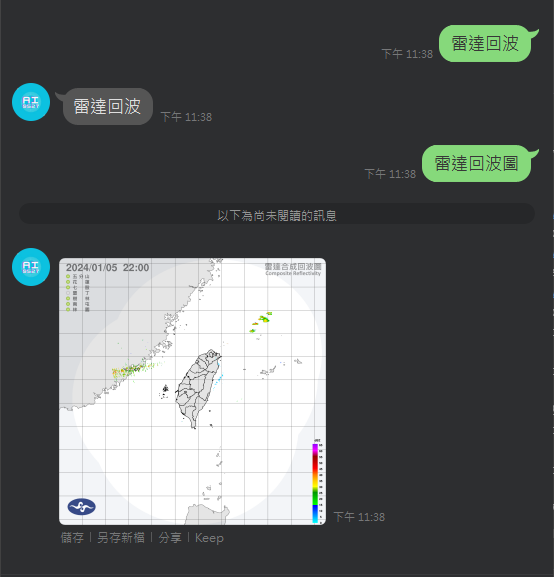